In [1]:
#Importing the Libraries
import pandas as pd

from datetime import datetime

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import sklearn as skl

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn import linear_model
# from keras.models import Sequential
# from keras.layers import Dense
# import keras.backend as K
# from keras.callbacks import EarlyStopping
#from keras.optimizers import Adam
# from keras.models import load_model
# from keras.layers import LSTM
# from keras.utils.vis_utils import plot_model

In [2]:
#Get the Dataset
df=pd.read_csv("NewData/WFC2016_2022.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-19,49.250000,49.540001,47.990002,48.209999,39.842239,29918500
2016-01-20,47.279999,48.250000,46.880001,47.869999,39.561249,40241100
2016-01-21,48.029999,49.049999,47.910000,48.009998,39.676952,24272900
2016-01-22,49.029999,49.270000,48.560001,49.020000,40.511646,18298700
2016-01-25,48.910000,48.980000,47.619999,47.660000,39.387703,23440800


In [3]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (1596, 6)
Null Value Present:  False


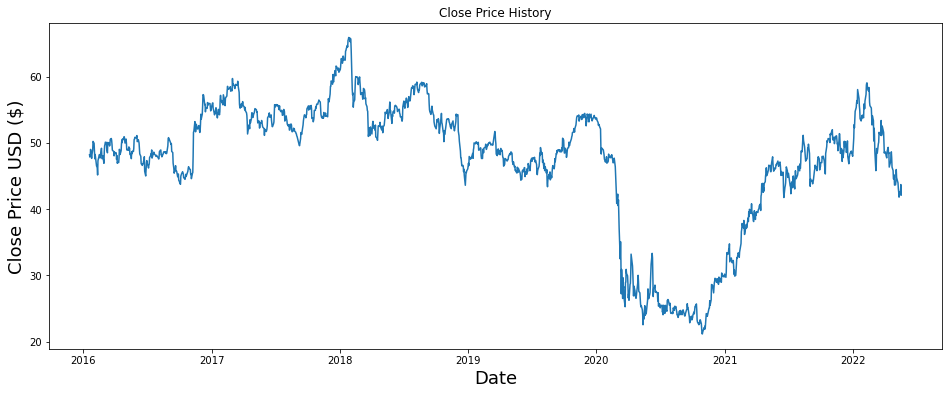

In [5]:
# get the current prices: 

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1517

In [7]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.60437596],
       [0.59678498],
       [0.59991066],
       ...,
       [0.47041749],
       [0.50390711],
       [0.4681849 ]])

In [8]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.60437596, 0.59678498, 0.59991066, 0.62246038, 0.59209646,
       0.60549226, 0.61241349, 0.62022769, 0.64947534, 0.64300066,
       0.61821841, 0.59075683, 0.60526904, 0.59656176, 0.56619782,
       0.56508152, 0.55883006, 0.53628043, 0.58428224, 0.60504582,
       0.6025899 , 0.59365931, 0.60169682, 0.62625585, 0.60192004,
       0.59098016, 0.59410584, 0.60125029, 0.57557487, 0.61576248,
       0.63473991, 0.63920519, 0.64679619, 0.64590311, 0.62313015,
       0.61732533, 0.61107386, 0.64590311, 0.64166112, 0.64389373,
       0.63407014, 0.63831213, 0.65639655, 0.65929891, 0.65260101,
       0.63898188, 0.61978125, 0.61531595, 0.60080374, 0.61419965,
       0.60772497, 0.60973435, 0.61085064, 0.58874745, 0.6014736 ,
       0.57579818, 0.57892388, 0.5780308 , 0.59455236, 0.62268362])]
[0.6173253266951255]

[array([0.60437596, 0.59678498, 0.59991066, 0.62246038, 0.59209646,
       0.60549226, 0.61241349, 0.62022769, 0.64947534, 0.64300066,
       0.61821841, 0.59075683, 0.605

(1457, 60, 1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1457/1457 [==============================] - 41s 27ms/step - loss: 0.0026


In [10]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1.7528164324412447

<ipython-input-11-a43d80d584d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


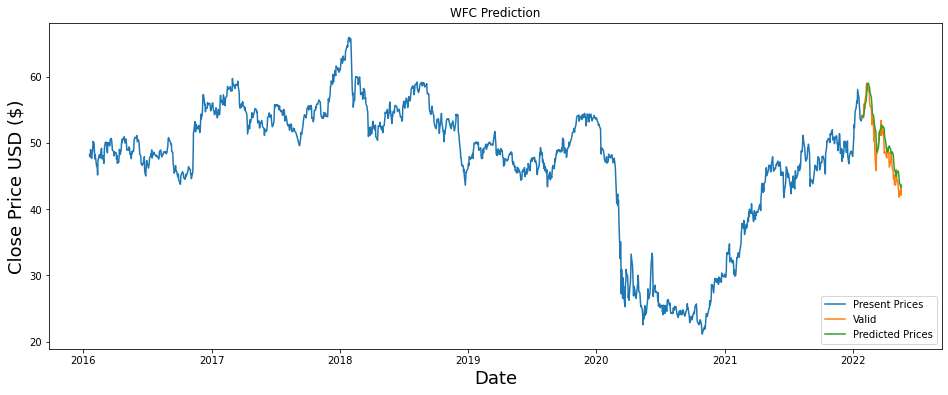

In [11]:
# Plot the future data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('WFC Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Present Prices', 'Valid', 'Predicted Prices'], loc='lower right')
plt.show()

In [12]:
valid

,Close,Predictions
Date,,
2022-01-26,54.139999,53.916584
2022-01-27,53.759998,53.830402
2022-01-28,54.189999,53.873806
2022-01-31,53.799999,54.097706
2022-02-01,55.599998,54.257198
...,...,...
2022-05-12,41.810001,44.641788
2022-05-13,42.639999,43.957432
2022-05-16,42.209999,43.577732
